# Regression Phase 5: Assessing Fit (polynomial regression)

In this phase, we will be using polynomial regression as a means to examine this data fit.

* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

# Import graphlab

In [93]:
import graphlab


Next we're going to write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree.

The easiest way to apply a power to an SArray is to use the .apply() and lambda x: functions. For example to take the example array and compute the third power we can do as follows:

In [94]:
tmp = graphlab.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


We can create an empty SFrame using graphlab.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [95]:
ex_sframe = graphlab.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



# Polynomial_sframe function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [96]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = graphlab.SArray(feature)
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
    return poly_sframe

In [97]:
# test the function
print polynomial_sframe(tmp, 3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualizing polynomial regression


Let's use matplotlib to visualize what a polynomial regression looks like on some real data.


In [98]:
hotels = graphlab.SFrame('SF_0423.csv')
# convert the string to float
hotels['price'] = hotels['price'].astype(float)
hotels['rates'] = hotels['rates'].astype(float)
hotels['zipcode'] = hotels['zipcode'].astype(float)

hotels = hotels[hotels['size'] < 1500] 
hotels = hotels[hotels['price'] > 10]

Finished parsing file /Users/Peter/SF_0423.csv

Parsing completed. Parsed 100 lines in 0.035906 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,float,float,str,str,str,str,int,int,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Peter/SF_0423.csv

Parsing completed. Parsed 1056 lines in 0.017717 secs.

As in phase 5, we will use the star variable. For plotting purposes (connecting the dots), we will need to sort by the values of star. For hotels with the same size value, we break the tie by their prices.

In [99]:
hotels = hotels.sort(['size', 'price'])

Let's start with a degree 1 polynomial using 'star' (i.e. a line) to predict 'price' and plot what it looks like.

In [100]:
poly1_data = polynomial_sframe(hotels['size'], 1)
poly1_data['price'] = hotels['price'] # add price to the data since it's the target
poly1_data

power_1,price
29,199.0
29,199.0
29,225.0
29,225.0
29,225.0
29,225.0
29,225.0
29,244.0
29,244.0
29,249.0


In [101]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1043

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000985     | 575.449039         | 107.284095    |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [102]:
#let's take a look at the weights before we plot
model1.get("coefficients")

name,index,value,stderr
(intercept),None,47.4111492231,8.9122801773
power_1,None,0.570298916587,0.0244190024807


In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

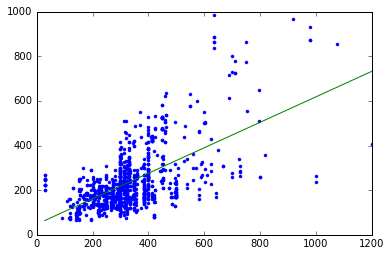

In [104]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'.

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 0.57 and intercept 47.4. What if we wanted to plot a second degree polynomial?


In [105]:
poly2_data = polynomial_sframe(hotels['size'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = hotels['price'] # add price to the data since it's the target
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1043

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.001964     | 573.109775         | 106.745622    |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [106]:
model2.get("coefficients")

name,index,value,stderr
(intercept),None,90.0061363141,15.8430335373
power_1,None,0.34292468859,0.0741605210228
power_2,None,0.000258235256664,7.95676255278e-05


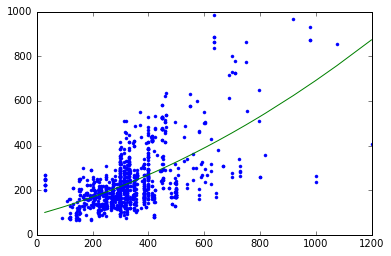

In [107]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. We can continue to explore the cubic:


In [108]:
poly3_data = polynomial_sframe(hotels['size'], 3)
my_features_3D = poly3_data.column_names() # get the name of the features
poly3_data['price'] = hotels['price'] # add price to the data since it's the target
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = my_features_3D, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1043

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.002322     | 531.471676         | 104.708107    |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [109]:
model3.get("coefficients")


name,index,value,stderr
(intercept),None,200.714507217,23.3931019826
power_1,None,-0.609277064948,0.166924538039
power_2,None,0.00254087500997,0.000368282770703
power_3,None,-1.50299850451e-06,2.36872731135e-07


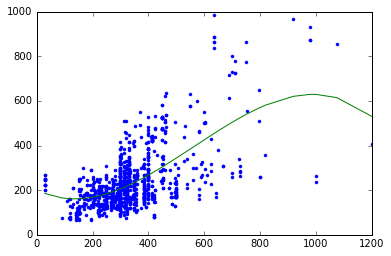

In [110]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

Now try a 15th degree polynomial:

In [111]:
poly15_data = polynomial_sframe(hotels['size'], 15)
my_features_15D = poly15_data.column_names() # get the name of the features
poly15_data['price'] = hotels['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features_15D, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1043

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.009305     | 524.366124         | 103.299598    |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [112]:
model15.get("coefficients").tail()

name,index,value,stderr
power_6,None,4.49709250885e-15,7.32419043604e-11
power_7,None,-6.6970286064e-18,2.37414145805e-18
power_8,None,6.91333927702e-19,1.3354288365e-18
power_9,None,-1.48092554688e-24,5.31290235811e-19
power_10,None,-1.11637277815e-27,1.66911548422e-21
power_11,None,-3.14689443697e-31,2.54176988854e-24
power_12,None,3.07803877881e-34,2.28395318969e-27
power_13,None,5.00782145366e-37,1.2423413696e-30
power_14,None,2.7133034475e-40,3.81752393066e-34
power_15,None,-2.54368847296e-43,5.12988651211e-38


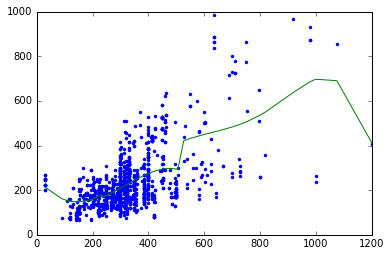

In [113]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

# Changing the data and re-learning


We're going to use the data set from LA to see what the 15th plot would look like. 


In [114]:
hotels_la = graphlab.SFrame('LA_0421.csv')
# convert the string to float
hotels_la['price'] = hotels_la['price'].astype(float)
hotels_la['rates'] = hotels_la['rates'].astype(float)

hotels_la = hotels_la[hotels_la['size'] < 1500] 
hotels_la = hotels_la[hotels_la['price'] > 10]

Finished parsing file /Users/Peter/LA_0421.csv

Parsing completed. Parsed 100 lines in 0.035654 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,str,str,str,str,int,str,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Peter/LA_0421.csv

Parsing completed. Parsed 1467 lines in 0.019337 secs.

In [115]:
hotels_la = hotels_la.sort(['size', 'price'])

In [116]:
poly15_data_la = polynomial_sframe(hotels_la['size'], 15)
my_features_15D_la = poly15_data_la.column_names() # get the name of the features
poly15_data_la['price'] = hotels_la['price'] # add price to the data since it's the target
model15_la = graphlab.linear_regression.create(poly15_data_la, target = 'price', features = my_features_15D_la, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1449

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.013114     | 600.714407         | 126.036127    |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

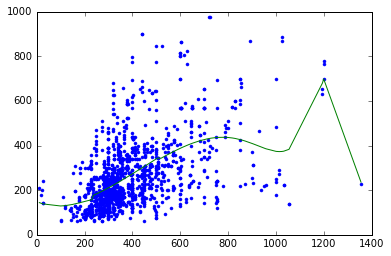

In [117]:
plt.plot(poly15_data_la['power_1'],poly15_data_la['price'],'.',
        poly15_data_la['power_1'], model15_la.predict(poly15_data_la),'-')

In [119]:
model15_la.get('coefficients')

name,index,value,stderr
(intercept),None,148.976889789,170.327811805
power_1,None,-0.470791932196,10.1482845059
power_2,None,0.00302488485082,0.166643469039
power_3,None,-3.01798263917e-06,0.00126174586147
power_4,None,-7.65629171565e-11,5.13360618957e-06
power_5,None,1.50595969928e-12,1.14004283205e-08
power_6,None,-3.85108434097e-16,1.16341151519e-11
power_7,None,5.35967678084e-19,1.67413718306e-18
power_8,None,-9.78947464374e-19,1.48575168247e-18
power_9,None,-1.1293234981e-24,4.52712619519e-20


# Selecting a Polynomial Degree

Whenever we have a  parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set.

We split the hotels dataset 3-way into training set, test set, and validation set as follows:

Split our hotels data into 2 sets: training_and_validation and testing. Use random_split(0.9, seed=1).
Further split our training data into two sets: training and validation. Use random_split(0.5, seed=1).


In [120]:
training_and_validation, testing = hotels_la.random_split(0.9, seed=1)
training, validation = training_and_validation.random_split(0.5, seed=1)

Next we should write a loop that does the following:


* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['size'] at the current degree
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to size vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here we will want to use .predict()) for that degree and we will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data

In [123]:
RSS = dict()
for D in range(1,15+1):
    some_poly_data = polynomial_sframe(training['size'], D)
    my_features_some = some_poly_data.column_names() # get the name of the features
    some_poly_data['price'] = training['price'] # add price to the data since it's the target
    the_model = graphlab.linear_regression.create(some_poly_data, target = 'price', features = my_features_some, validation_set = None,verbose =False)
    #the_model.get("coefficients").print_rows(num_rows = D+1)
    validation_poly_data = polynomial_sframe(validation['size'], D)
    predictions = the_model.predict(validation_poly_data)
    Err = validation['price'] - predictions
    RSS[D] = sum(Err**2)
    print 'RSS:', 'degree -',D, RSS[D]

print 'Best Degree of polynomial:'  , min(RSS, key = RSS.get)

RSS: degree - 1 10487215.8642
RSS: degree - 2 10496410.0083
RSS: degree - 3 10459943.353
RSS: degree - 4 10381491.8443
RSS: degree - 5 10394120.4069
RSS: degree - 6 10399810.5807
RSS: degree - 7 10487897.2479
RSS: degree - 8 10515427.9504
RSS: degree - 9 10488487.8361
RSS: degree - 10 10461252.0187
RSS: degree - 11 10444465.3905
RSS: degree - 12 10434939.5544
RSS: degree - 13 10429314.1735
RSS: degree - 14 10425576.8841
RSS: degree - 15 10422674.6065
Best Degree of polynomial: 4


In [127]:
d4_poly_data = polynomial_sframe(training['size'], 4)
my_features_some = d4_poly_data.column_names() # get the name of the features
d4_poly_data['price'] = training['price'] # add price to the data since it's the target
d4_model = graphlab.linear_regression.create(d4_poly_data, target = 'price', features = my_features_some, validation_set = None,verbose =False)
test_poly_data = polynomial_sframe(testing['size'], 4)
predictions = d4_model.predict(test_poly_data)
Err = testing['price'] - predictions
RSS = sum(Err**2)
print 'RSS: -', RSS

RSS: - 2391065.61163
